## Functions and imports

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import roc_curve, auc, plot_roc_curve, confusion_matrix, plot_confusion_matrix,classification_report

## Data exploration

In [3]:
data = pd.read_csv("train.csv")
X, y = data.iloc[:,:-1], data.iloc[:,-1]
train = X.drop('id',axis=1)
train.head()

,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,num_of_product_pages,...,ExitRates,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser
0,0.0,84.958154,Feb,0.0 minutes,0.20,0.0 minutes,NaN,1.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_1,0.0,safari_13
1,0.0,102.100162,Feb,64.0 minutes,0.00,0.0 minutes,NaN,2.0,0.0,2.0,...,0.10,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,chrome_89
2,0.0,100.991064,Feb,0.0 minutes,0.20,0.0 minutes,NaN,4.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,9.0,0.0,0.0,c_3,0.0,safari_15
3,0.0,120.605525,Feb,2.666666667 minutes,0.05,0.0 minutes,NaN,3.0,0.0,2.0,...,0.14,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_4,0.0,chrome_89
4,0.0,87.423708,Feb,627.5 minutes,0.02,0.0 minutes,NaN,3.0,NaN,10.0,...,0.05,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,1.0,browser_3_v9


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   closeness_to_holiday   9834 non-null   float64
 1   B                      10456 non-null  float64
 2   Month                  10458 non-null  object 
 3   product_page_duration  9872 non-null   object 
 4   BounceRates            10465 non-null  float64
 5   info_page_duration     10139 non-null  object 
 6   total_duration         5721 non-null   float64
 7   device                 10094 non-null  float64
 8   num_of_admin_pages     10031 non-null  float64
 9   num_of_product_pages   9962 non-null   float64
 10  C                      10461 non-null  object 
 11  ExitRates              10452 non-null  float64
 12  num_of_info_pages      9821 non-null   float64
 13  D                      109 non-null    float64
 14  user_type              10455 non-null  object 
 15  Re

In [5]:
train.isnull().sum()

closeness_to_holiday       645
B                           23
Month                       21
product_page_duration      607
BounceRates                 14
info_page_duration         340
total_duration            4758
device                     385
num_of_admin_pages         448
num_of_product_pages       517
C                           18
ExitRates                   27
num_of_info_pages          658
D                        10370
user_type                   24
Region                      18
admin_page_duration        667
PageValues                  14
A                          389
Weekend                     23
internet_browser           644
dtype: int64

In [6]:
train.shape

(10479, 21)

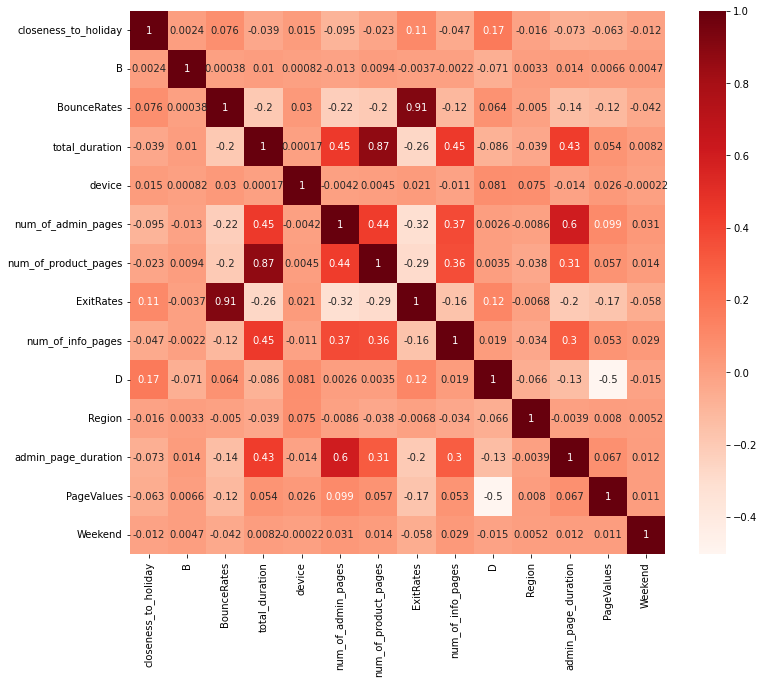

In [7]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Plotting Functions

# Bar Plot
def bar_plot(x, kind, color, data, height, aspect, x_lab, y_lab, title,name=''):
    sns.catplot(x=x, kind=kind, color=color, data=data, height=height, aspect=aspect);
    plt.ylabel(y_lab)
    plt.xlabel(x_lab)
    plt.title(title)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    return plt

# Distributions Charts:
def distributions(df, col):
    sns.kdeplot(df[col], shade=True, color = 'darkturquoise');
    plt.title('KDE plot for column %s'%str(col))
    return plt

# Pie Plot
def pie_plot(size, lables, explode, colors, autopct, pctdistance, shadow, center, title, i, figsize):
    plt.figure(figsize=figsize)
    plt.pie(size, labels=lables, explode=explode, colors=colors, autopct=autopct, pctdistance=pctdistance, 
                   shadow=shadow, center=center)
    plt.title(title + ' ' + i)
    return plt

# Corellation Chart:
def corr_chart(df, graph = True):
    corr = df.corr()
    if graph:
        plt.matshow(corr)
        plt.show()
    return corr

# Corellation heatmap chart:
def corr_heat_chart(df, graph = True):
    sns.heatmap(df.corr(),
                xticklabels=df.corr().columns,
                yticklabels=df.corr().columns)
    return plt

#Box plot chart
def boxplot(df,name='box plot'):
    print('Box plot of all features:')
    df.plot.box(figsize=(18,10),patch_artist=True)
    # plt.savefig(f'plots/{name}.png',bbox_inches='tight')
    plt.show()

In [8]:
#boxplot(train,name='data boxplot')

In [9]:
#boxplot(train[train.columns.difference(['D'])])

In [10]:
#boxplot(train[train.columns.difference(['D','total_duration'])])

In [11]:
#boxplot(train[train.columns.difference(['D','total_duration','admin_page_duration'])])

In [12]:
#boxplot(train[train.columns.difference(['D','total_duration','admin_page_duration','num_of_product_pages', 'PageValues'])])

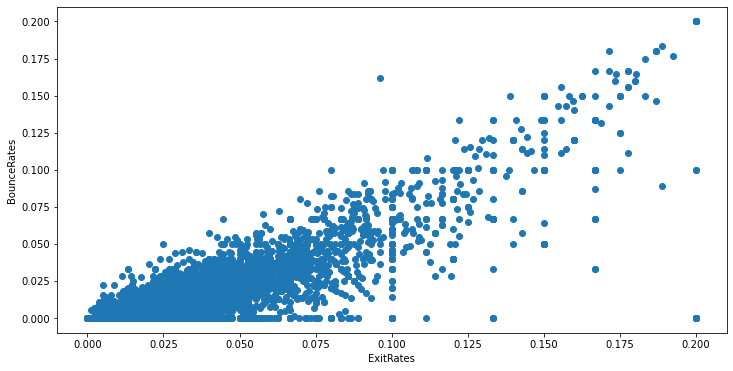

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(train['ExitRates'], train['BounceRates'])
ax.set_xlabel('ExitRates')
ax.set_ylabel('BounceRates')
plt.show()

In [11]:
X.nunique()

id                       10479
closeness_to_holiday         6
B                        10456
Month                       10
product_page_duration     7795
BounceRates               1661
info_page_duration        1090
total_duration            4795
device                       8
num_of_admin_pages          27
num_of_product_pages       291
C                            6
ExitRates                 4143
num_of_info_pages           16
D                          109
user_type                    3
Region                       9
admin_page_duration       2799
PageValues                2282
A                           97
Weekend                      2
internet_browser           125
dtype: int64

In [12]:
data.describe()

,id,closeness_to_holiday,B,BounceRates,total_duration,device,num_of_admin_pages,num_of_product_pages,ExitRates,num_of_info_pages,D,Region,admin_page_duration,PageValues,Weekend,purchase
count,10479.000000,9834.000000,10456.000000,10465.000000,5721.000000,10094.000000,10031.000000,9962.000000,10452.000000,9821.000000,109.000000,10461.000000,9812.000000,10465.000000,10456.000000,10479.000000
mean,6139.582689,0.061826,100.059573,0.022255,1307.807873,2.116505,2.326986,31.618651,0.043169,0.501884,4.382902,3.144059,81.787334,5.898870,0.233837,0.154690
std,3565.347971,0.199605,9.952417,0.048664,1967.444484,0.898218,3.336398,44.797072,0.048709,1.258180,2.279466,2.403390,180.916462,18.812536,0.423290,0.361626
min,0.000000,0.000000,65.475267,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.986673,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3057.500000,0.000000,93.304430,0.000000,217.000000,2.000000,0.000000,7.000000,0.014286,0.000000,3.282590,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6122.000000,0.000000,100.025877,0.003109,682.700000,2.000000,1.000000,18.000000,0.025398,0.000000,4.915126,3.000000,8.000000,0.000000,0.000000,0.000000
75%,9215.500000,0.000000,106.954284,0.016970,1626.633333,3.000000,4.000000,38.000000,0.050000,0.000000,6.141652,4.000000,92.600000,0.000000,0.000000,0.000000
max,12329.000000,1.000000,134.272999,0.200000,34576.950690,8.000000,27.000000,705.000000,0.200000,16.000000,8.173454,9.000000,3398.750000,361.763742,1.000000,1.000000


In [13]:
data['purchase'].value_counts()

0    8858
1    1621
Name: purchase, dtype: int64

In [15]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

C:\Users\shani\AppData\Local\Temp\ipykernel_12272\3201247229.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


A                           0
B                          62
BounceRates              1305
C                           0
D                           0
ExitRates                 929
Month                       0
PageValues               2299
Region                    433
Weekend                  2445
admin_page_duration       951
closeness_to_holiday     1007
device                     84
id                          0
info_page_duration          0
internet_browser            0
num_of_admin_pages        331
num_of_info_pages        2098
num_of_product_pages      792
product_page_duration       0
purchase                    0
total_duration            431
user_type                   0
dtype: int64

Box plot of all features:


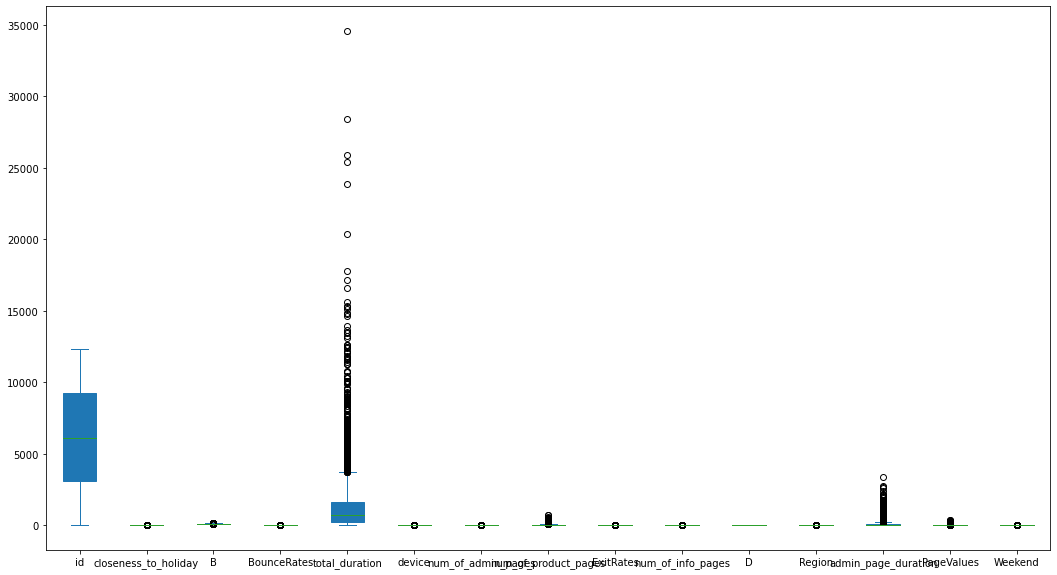

In [16]:
boxplot(X,name='data boxplot')

Box plot of all features:


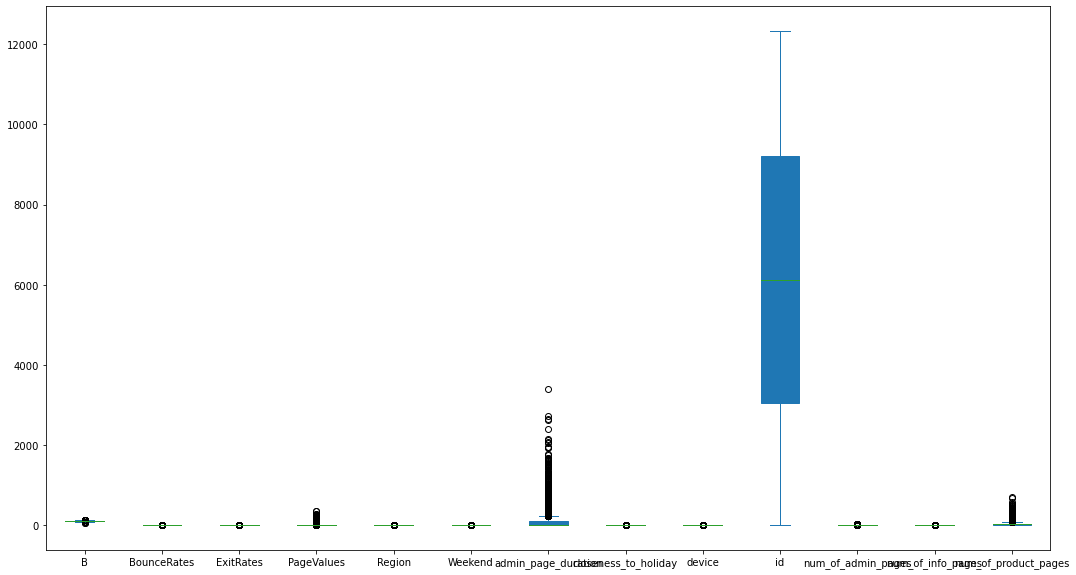

In [17]:
boxplot(X[X.columns.difference(['D', 'total_duration'])])

In [18]:
data.describe(include='object')

,Month,product_page_duration,info_page_duration,C,user_type,A,internet_browser
count,10458,9872,10139,10461,10455,10090,9835
unique,10,7795,1090,6,3,97,125
top,May,0.0 minutes,0.0 minutes,log202,Returning_Visitor,c_2,chrome_80
freq,2869,621,8168,1825,8941,3214,1102


<Figure size 432x288 with 0 Axes>

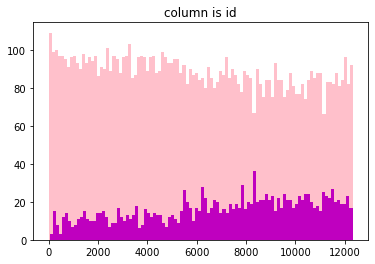

<Figure size 432x288 with 0 Axes>

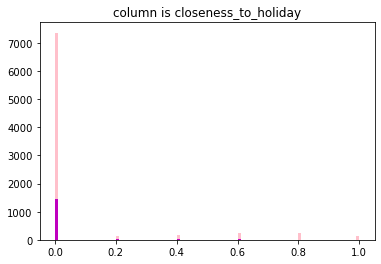

<Figure size 432x288 with 0 Axes>

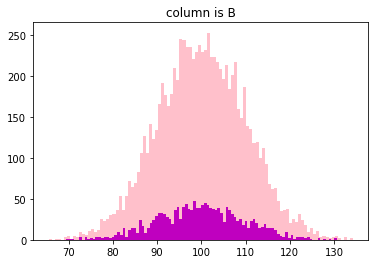

<Figure size 432x288 with 0 Axes>

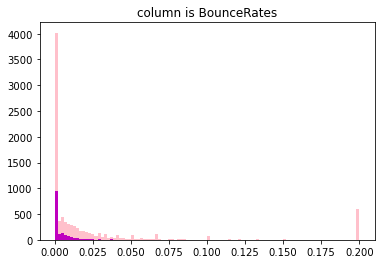

<Figure size 432x288 with 0 Axes>

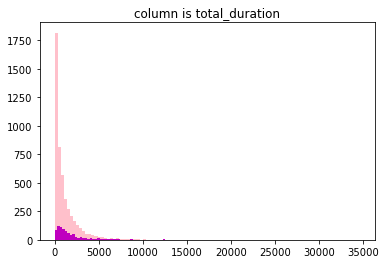

<Figure size 432x288 with 0 Axes>

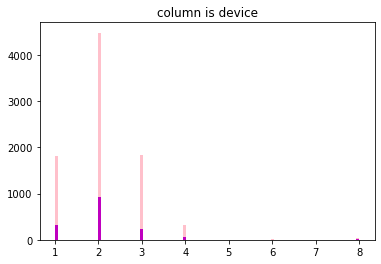

<Figure size 432x288 with 0 Axes>

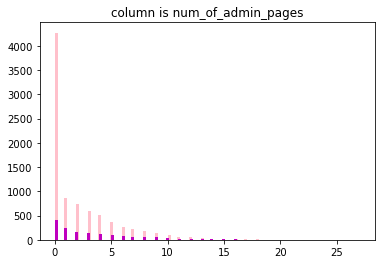

<Figure size 432x288 with 0 Axes>

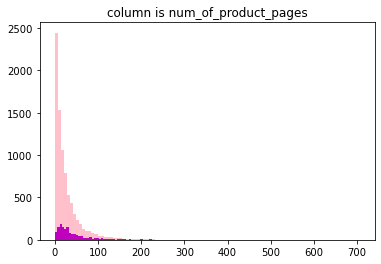

<Figure size 432x288 with 0 Axes>

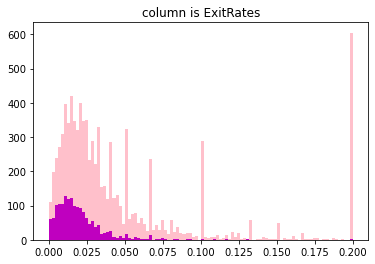

<Figure size 432x288 with 0 Axes>

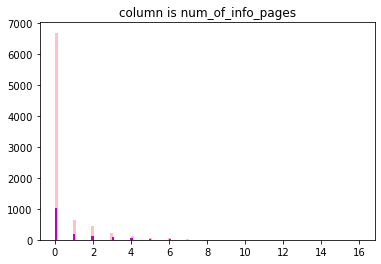

<Figure size 432x288 with 0 Axes>

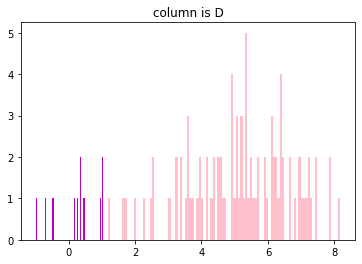

<Figure size 432x288 with 0 Axes>

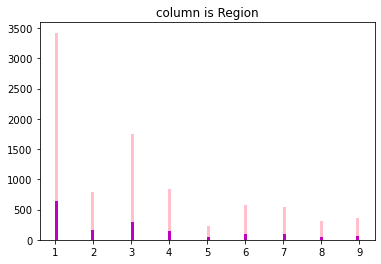

<Figure size 432x288 with 0 Axes>

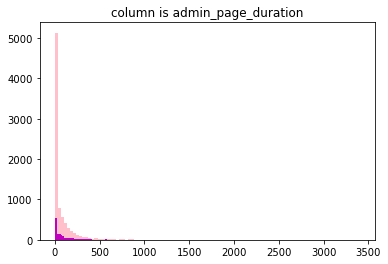

<Figure size 432x288 with 0 Axes>

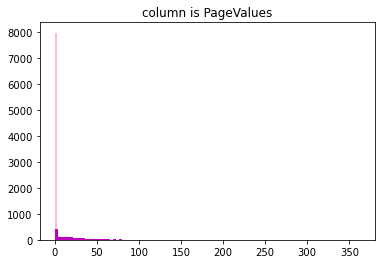

<Figure size 432x288 with 0 Axes>

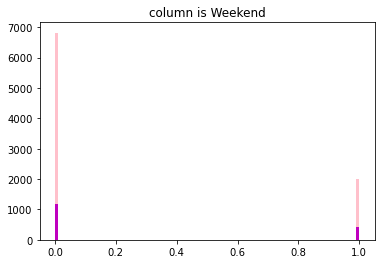

<Figure size 432x288 with 0 Axes>

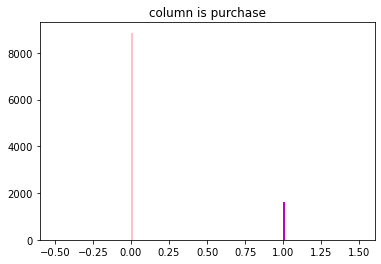

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics)
zero_df = newdf[newdf['purchase']==0]
one_df = newdf[newdf['purchase']==1]
num_of_bins = 100
for i in newdf.columns:
    plt.figure()
    fig, ax = plt.subplots()
    ax.hist(zero_df[i], bins=num_of_bins, color='pink')
    ax.hist(one_df[i], bins=num_of_bins, color='m')
    ax.set_title(f'column is {i}')
    plt.show()
    # fig.savefig(f'plots/feature {i}', bbox_inches='tight')

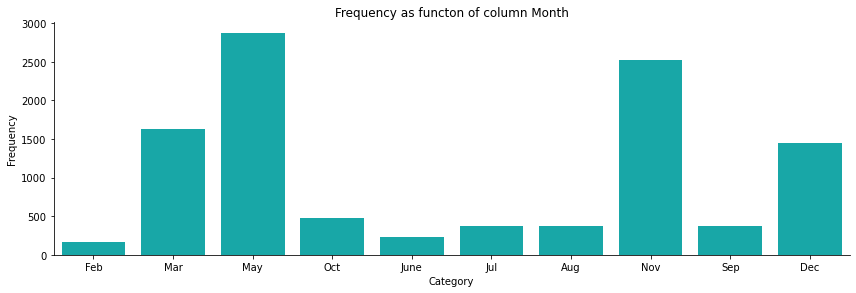

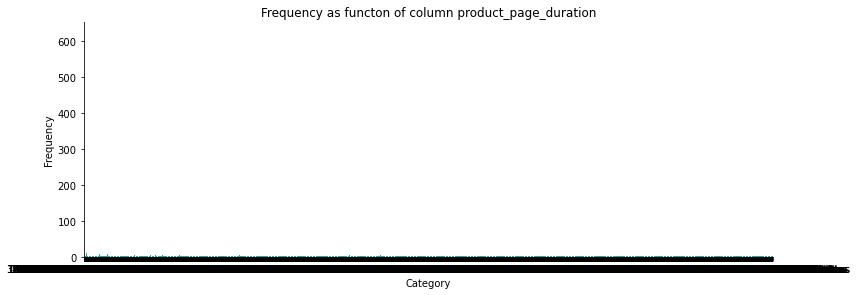

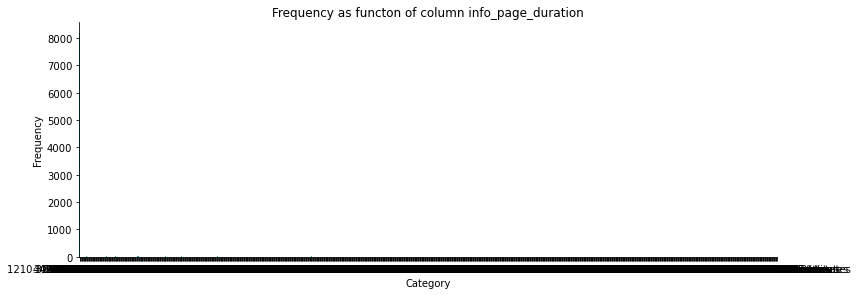

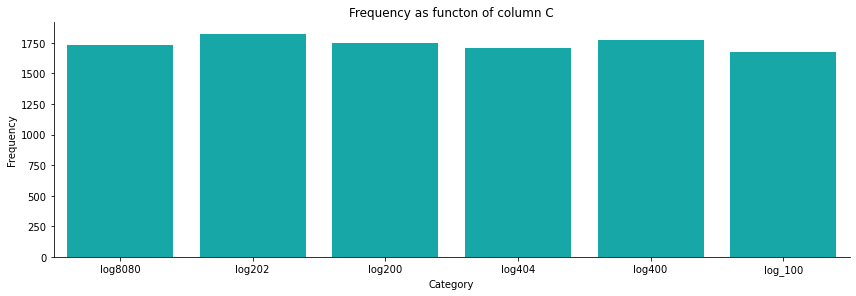

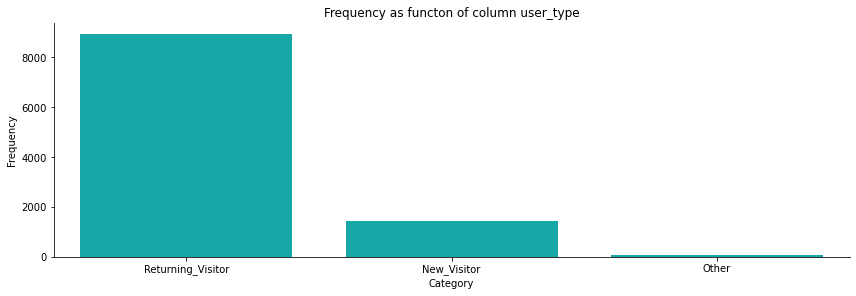

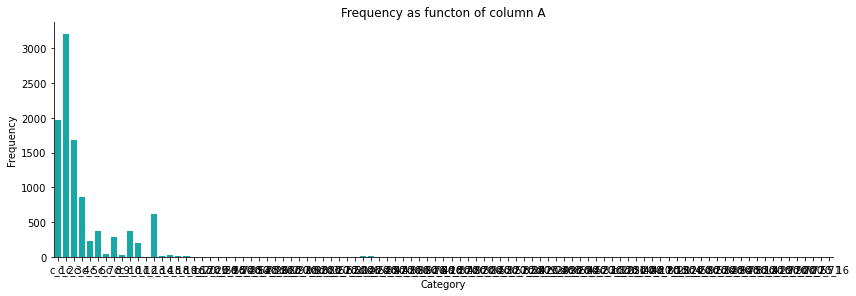

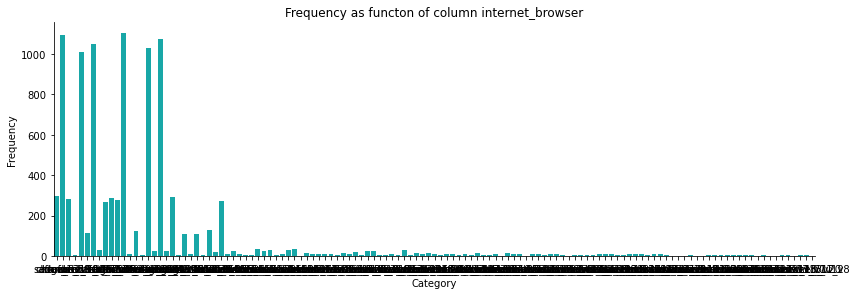

In [20]:
cat_df = data.select_dtypes(include=object)
for col in cat_df.columns:
    bar_plot(col,'count','c',data,4,3,'Category','Frequency',f'Frequency as functon of column {col}',name=f'feature {col}')

# Pre-processing

## clean the duration fields from the "minutes" str

In [21]:

# start stop and step variables
start, stop, step = 0, -7, 1

# slicing till 2nd last element
train["product_page_duration"]= train["product_page_duration"].str.slice(start, stop, step)
  
# converting to float data type
train["product_page_duration"]= train["product_page_duration"].astype(float)


# slicing till 2nd last element
train["info_page_duration"]= train["info_page_duration"].str.slice(start, stop, step)
  
# converting to float data type
train["info_page_duration"]= train["info_page_duration"].astype(float)


## dealing with the durations values

In [22]:

imputer = KNNImputer(n_neighbors=10)

train[['product_page_duration','info_page_duration','admin_page_duration']] = pd.DataFrame(imputer.fit_transform(train[['product_page_duration','info_page_duration','admin_page_duration']]))

sum_duration= train["admin_page_duration"]+train["info_page_duration"]+train["product_page_duration"]

train["total_duration"]=train["total_duration"].fillna(sum_duration)

## dealing with the A values

In [23]:
start, stop, step = 2,0, 1
train["A"]= train["A"].str.replace('_','.')

train["A"]= train["A"].str.slice(2)
  
# converting to float data type
train["product_page_duration"]= train["product_page_duration"].astype(float)

## categorey data - insert to nan values the most friquency value of the colum

In [24]:
train['Month']=train['Month'].fillna(train['Month'].value_counts().idxmax())

train['closeness_to_holiday']=train['closeness_to_holiday'].fillna(train['closeness_to_holiday'].value_counts().idxmax())

train['device']=train['device'].fillna(train['device'].value_counts().idxmax())

train['num_of_admin_pages']=train['num_of_admin_pages'].fillna(train['num_of_admin_pages'].value_counts().idxmax())

train['num_of_product_pages']=train['num_of_product_pages'].fillna(train['num_of_product_pages'].value_counts().idxmax())

train['num_of_info_pages']=train['num_of_info_pages'].fillna(train['num_of_info_pages'].value_counts().idxmax())

train['user_type']=train['user_type'].fillna(train['user_type'].value_counts().idxmax())

train['Weekend']=train['Weekend'].fillna(train['Weekend'].value_counts().idxmax())

train['internet_browser']=train['internet_browser'].fillna(train['internet_browser'].value_counts().idxmax())

train['C']=train['C'].fillna(train['C'].value_counts().idxmax())

train['A']=train['A'].fillna(train['A'].value_counts().idxmax())

train['Region']=train['Region'].fillna(train['Region'].value_counts().idxmax())


## sperate the internet_browser data to browser and version

In [25]:

train['internet_browser']=train['internet_browser'].str.replace('_v','.')
train[['browser','version']]=train['internet_browser'].str.split('_',expand=True)

train["version"]= train["version"].str.slice(0,2)

train = train.drop('internet_browser',axis=1)

## float data - insert to nan values according to KNN 

In [26]:

imputer = KNNImputer(n_neighbors=10)

train[['B','ExitRates','PageValues','BounceRates','D']] = pd.DataFrame(imputer.fit_transform(train[['B','ExitRates','PageValues','BounceRates','D']]))

## remove D and version colum

In [27]:
train=train.drop('D',axis=1)
train=train.drop('B',axis=1)  ### mybe we dont need to remove B it seems like we should, just checking!!!!!!
train=train.drop('version',axis=1)

## maching the types of the data

In [28]:
train['device']=train['device'].astype('category')
train['Region']=train['Region'].astype('category')
train['Month']=train['Month'].astype('category')
train['C']=train['C'].astype('category')
train['Weekend']=train['Weekend'].astype('category')
train['browser']=train['browser'].astype('category')
train['user_type']=train['user_type'].astype('category')

train['num_of_admin_pages']=train['num_of_admin_pages'].astype('int64')
train['num_of_product_pages']=train['num_of_product_pages'].astype('int64')
train['num_of_info_pages']=train['num_of_info_pages'].astype('int64')
train['num_of_product_pages']=train['num_of_product_pages'].astype('int64')
train['num_of_info_pages']=train['num_of_info_pages'].astype('int64')
train['A']=train['A'].astype('float64')

## dealing with category data

In [29]:
a = pd.get_dummies(train['Month'], prefix = "Month")
c = pd.get_dummies(train['user_type'], prefix = "user_type")
d = pd.get_dummies(train['C'], prefix = "C")
e = pd.get_dummies(train['device'], prefix = "device")
f = pd.get_dummies(train['browser'], prefix = "browser")
frames = [train,a, c, d, e,f]
train = pd.concat(frames, axis = 1)

train = train.drop(columns = ['Month','user_type','C','device','browser'])

In [30]:
train

,closeness_to_holiday,product_page_duration,BounceRates,info_page_duration,total_duration,num_of_admin_pages,num_of_product_pages,ExitRates,num_of_info_pages,Region,...,device_3.0,device_4.0,device_5.0,device_6.0,device_7.0,device_8.0,browser_browser,browser_chrome,browser_edge,browser_safari
0,0.0,0.000000,0.200000,0.0,0.000000,0,1,0.200000,0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,64.000000,0.000000,0.0,64.000000,0,2,0.100000,0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.000000,0.200000,0.0,0.000000,0,1,0.200000,0,9.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,2.666667,0.050000,0.0,2.666667,0,2,0.140000,0,2.0,...,1,0,0,0,0,0,0,1,0,0
4,0.0,627.500000,0.020000,0.0,627.500000,0,10,0.050000,0,1.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,0.0,1783.791667,0.007143,0.0,1928.791667,3,53,0.029031,0,1.0,...,0,1,0,0,0,0,1,0,0,0
10475,0.0,465.750000,0.000000,0.0,465.750000,0,5,0.021333,0,1.0,...,1,0,0,0,0,0,0,1,0,0
10476,0.0,184.250000,0.083333,0.0,184.250000,0,6,0.086667,0,1.0,...,1,0,0,0,0,0,0,1,0,0
10477,0.0,346.000000,0.000000,0.0,421.000000,4,15,0.021053,0,3.0,...,0,0,0,0,0,0,0,1,0,0


## Drop the columns with high cooralation

In [32]:
c = train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

upper_tri = c.where(np.triu(np.ones(c.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
train = train.drop(columns = to_drop)

C:\Users\aviv.c\AppData\Local\Temp\ipykernel_25588\3042715162.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = c.where(np.triu(np.ones(c.shape),k=1).astype(np.bool))


In [33]:
finalDf = pd.concat([train, y], axis = 1)

## Standardization

In [34]:

train = pd.DataFrame(StandardScaler().fit_transform(train))



<bound method NDFrame.head of              0         1         2         3         4         5         6   \
0     -0.299192 -0.625664  3.654881 -0.243441 -0.675429 -0.658905 -0.384274   
1     -0.299192 -0.591652 -0.457443 -0.243441 -0.675429 -0.636269 -0.384274   
2     -0.299192 -0.625664  3.654881 -0.243441 -0.675429 -0.658905 -0.384274   
3     -0.299192 -0.624247  0.570638 -0.243441 -0.675429 -0.636269 -0.384274   
4     -0.299192 -0.292189 -0.046211 -0.243441 -0.675429 -0.455176 -0.384274   
...         ...       ...       ...       ...       ...       ...       ...   
10474 -0.299192  0.322304 -0.310575 -0.243441  0.234239  0.518195 -0.384274   
10475 -0.299192 -0.378149 -0.457443 -0.243441 -0.675429 -0.568359 -0.384274   
10476 -0.299192 -0.527747  1.256025 -0.243441 -0.675429 -0.545722 -0.384274   
10477 -0.299192 -0.441788 -0.457443 -0.243441  0.537461 -0.341994 -0.384274   
10478 -0.299192 -0.614371 -0.457443 -0.243441 -0.675429 -0.613632 -0.384274   

             7       

In [35]:
finalDf = pd.concat([train, y], axis = 1)
finalDf.head

<bound method NDFrame.head of               0         1         2         3         4         5         6  \
0     -0.299192 -0.625664  3.654881 -0.243441 -0.675429 -0.658905 -0.384274   
1     -0.299192 -0.591652 -0.457443 -0.243441 -0.675429 -0.636269 -0.384274   
2     -0.299192 -0.625664  3.654881 -0.243441 -0.675429 -0.658905 -0.384274   
3     -0.299192 -0.624247  0.570638 -0.243441 -0.675429 -0.636269 -0.384274   
4     -0.299192 -0.292189 -0.046211 -0.243441 -0.675429 -0.455176 -0.384274   
...         ...       ...       ...       ...       ...       ...       ...   
10474 -0.299192  0.322304 -0.310575 -0.243441  0.234239  0.518195 -0.384274   
10475 -0.299192 -0.378149 -0.457443 -0.243441 -0.675429 -0.568359 -0.384274   
10476 -0.299192 -0.527747  1.256025 -0.243441 -0.675429 -0.545722 -0.384274   
10477 -0.299192 -0.441788 -0.457443 -0.243441  0.537461 -0.341994 -0.384274   
10478 -0.299192 -0.614371 -0.457443 -0.243441 -0.675429 -0.613632 -0.384274   

              7      

## PCA

In [36]:
pca = PCA(.97)
principalComponents = pca.fit_transform(train)
principalDf = pd.DataFrame(data = principalComponents)
principalDf= pd.DataFrame(principalDf)
principalDf.shape
finalDf_pca = pd.concat([principalDf, y], axis = 1)
finalDf_pca.shape

(10479, 35)

## Remove outliers

In [37]:
finalDf = finalDf[(np.abs(stats.zscore(train)) < 10).all(axis=1)]
finalDf.head()
finalDf.shape

(10313, 43)

In [38]:
X = finalDf.iloc[:,:-1].values
y = finalDf.iloc[:,-1].values
X_pca = finalDf_pca.iloc[:,:-1].values
y_pca = finalDf_pca.iloc[:,-1].values

In [39]:
def KfoldCalc(X, y, clf, k,to_plot = True,overfit=True,data_name='normal'):
    clf_name = str(clf)[:str(clf).find('(')]
    #initlize Kfolds model
    kf = KFold(n_splits= k,random_state=69, shuffle=True)

    #initial fpr and tpr
    tprs = []
    tprs_train = []
    
    # lists for overfitting check
    fpr_overfit = []
    fpr_train_overfit = []
    tpr_overfit = []
    tpr_train_overfit = []

    fpr_axis = np.linspace(0, 1, 100) #creating array with evenly spaced numbers pver the interval of 100
    
    #Create plots if needed
    if to_plot:
        fig = plt.figure(facecolor='w',figsize=(16, 4))

        train_plt = fig.add_subplot(121) 
        plt.title(f'Train data ROC for {clf_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        test_plt = fig.add_subplot(122)
        plt.title(f'Validation data ROC for {clf_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

    for train_index, validation_index in kf.split(X):
        #split X and Y to train and validation sets
        X_train, X_validation = X[train_index],X[validation_index]
        y_train, y_validation = y[train_index],y[validation_index]

        #fit model with train data
        clf.fit(X_train, y_train)
        
        #Model prediction probabilities
        y_prob = clf.predict_proba(X_validation)[:,1] #validation prediction 
        y_train_prob =  clf.predict_proba(X_train)[:,1] #train prediction
        
        #ROC curve for current fold
        fpr, tpr, thresholds = roc_curve(y_validation, y_prob)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)

        fpr_overfit.append(fpr)
        tpr_overfit.append(tpr)

        fpr_train_overfit.append(fpr_train)
        tpr_train_overfit.append(tpr_train)

        if to_plot:
            #Plot current fold
            test_plt.plot(fpr,tpr,color='lightgray')
            train_plt.plot(fpr_train,tpr_train,color='lightgray')
            
        #interpolation for tpr 
        tpr = np.interp(fpr_axis, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)

        tpr_train = np.interp(fpr_axis, fpr_train, tpr_train)
        tpr_train[0] = 0.0
        tprs_train.append(tpr_train)
        


    #adapting parametrs for mean auc
    tprs = np.array(tprs)
    mean_tpr = tprs.mean(axis=0)
    mean_auc = auc(fpr_axis, mean_tpr)
    
    tprs_train = np.array(tprs_train)
    mean_tpr_train = tprs_train.mean(axis=0)
    mean_auc_train = auc(fpr_axis, mean_tpr_train)

    if to_plot:
        # Plot the whole k-folds lines and adapting design for chart
        test_plt.plot([0,1],[0,1], color='lightgray',linestyle ='-', label = 'K-folds')
        train_plt.plot([0,1],[0,1], color='lightgray',linestyle ='-', label = 'K-folds')
        # Plot mean ROC
        test_plt.plot(fpr_axis,mean_tpr,color='#9D46FA',linestyle='-', label = f'Mean ROC(area = {round(mean_auc,3)})')
        train_plt.plot(fpr_axis,mean_tpr_train,color='#9D46FA',linestyle='-', label = f'Mean ROC(area = {round(mean_auc_train,3)})')

        #ploting line for tpr=fpr
        test_plt.plot([0,1],[0,1],color='red',linestyle ='--')
        train_plt.plot([0,1],[0,1],color='red',linestyle ='--')

        #legend placement
        test_plt.legend(loc='lower right',edgecolor='k') 
        train_plt.legend(loc='lower right',edgecolor='k')
        # plt.savefig(f'plots/{data_name} {clf_name} roc.png', bbox_inches='tight')
        plt.show()

    if overfit:
        auc_val = []
        for l in range(len(tpr_overfit)):
            auc_val.append(auc(fpr_overfit[l], tpr_overfit[l]))
        auc_train = []
        for l in range(len(tpr_train_overfit)):
            auc_train.append(auc(fpr_train_overfit[l], tpr_train_overfit[l]))
        
        # chart
        difference = []
        for i in range(len(auc_train)):
            difference.append(1-(min(auc_train[i],auc_val[i])/max(auc_train[i],auc_val[i])))

        difference_df = pd.DataFrame(difference)
        print(f'Percentage Gaps: {str(difference)}')
        print(f'The mean AUC difference between the train and the validation is: {abs(mean_auc-mean_auc_train)}')
        plt.figure(figsize=(6,3))
        plt.plot(difference_df[0], difference_df[0], difference_df, color='#9D46FA')
        plt.title('Percentage gap between train and validation')
        plt.xlabel('number of fold')
        plt.ylabel('percentage difference')
        # plt.savefig(f'plots/{data_name} {clf_name} overfiting check.png', bbox_inches='tight')
        plt.show()

    return fpr_axis,mean_tpr,mean_auc,difference

In [40]:
lr_param = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1],'solver':['liblinear']}
knn_param = {'n_neighbors': range(10,20,3), 'weights':['uniform','distance'], 'metric':['euclidean', 'manhattan']}
ann_param = {'activation' : ["logistic", "relu"], 'hidden_layer_sizes' : [(100,), (50, 50),(20, 20, 10, 10, 10)],
                      'batch_size' : [50,40],
                      'learning_rate_init' : [0.01,0.001],
                      'max_iter' : [1500]}

RandomForest_param = {'criterion':['gini', 'entropy'],
    'n_estimators':[185, 187, 183],
    'max_depth':[70, 67, 73],
    'min_samples_leaf':[6,7,8],   
    'min_samples_split':[5, 3, 4]}
    
svm_param = {'kernel':['poly','rbf','sigmoid','linear'],'gamma':[000000.1,0.00001,0.0001],'degree':[5,7,8],'probability':[True]}
classifier_dic = {'Logistic': LogisticRegression, 'KNN': KNeighborsClassifier,'ANN':MLPClassifier,'SVC':SVC,'RandomForest':RandomForestClassifier}
params_dic = {'Logistic': lr_param,
              'KNN': knn_param,
              'ANN': ann_param,
              'SVC': svm_param,
             'RandomForest':RandomForest_param}
rand_search_clf = ['KNN','ANN','SVC','RandomForest']

In [41]:
def confusion_matrix_plot(X,y,clf):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        train_validation_confusion_matrix = confusion_matrix(y_test, y_pred)

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.matshow(train_validation_confusion_matrix, cmap=plt.cm.GnBu, alpha=0.3)
        for i in range(train_validation_confusion_matrix.shape[0]):
            for j in range(train_validation_confusion_matrix.shape[1]):
                ax.text(x=j, y=i,s=train_validation_confusion_matrix[i, j], va='center', ha='center', size='xx-large')

        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title(str(clf)+'Confusion Matrix', fontsize=18)
        plt.show()

In [42]:
def get_optimal_param(X,y,k,clf_dic,params_dic,rand_search_clf=None,data_name='normal'):
    res_dic = {}
    for clf_key in clf_dic.keys():
        clf = clf_dic[clf_key]
        if clf_key in rand_search_clf:
            GS = RandomizedSearchCV(clf(), param_distributions =params_dic[clf_key], scoring='roc_auc', n_jobs = -1) #use for high complexity algorithems, in order to decrease run time
        else:
            GS = GridSearchCV(clf(), param_grid= params_dic[clf_key], scoring='roc_auc', n_jobs = -1) #use for low complexity algorithems, in order to inrease performance
        
        GS.fit(X,y)
        clf = clf(**GS.best_params_)
        print(GS.best_params_)
        fpr_axis, mean_tpr,mean_auc, difference = KfoldCalc(X,y,clf,k,data_name=data_name)
        res_dic[clf_key] = {'fpr':fpr_axis, 'tpr':mean_tpr,'auc':mean_auc,'best_params':GS.best_params_}
        confusion_matrix_plot(X,y,clf)
    return res_dic

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


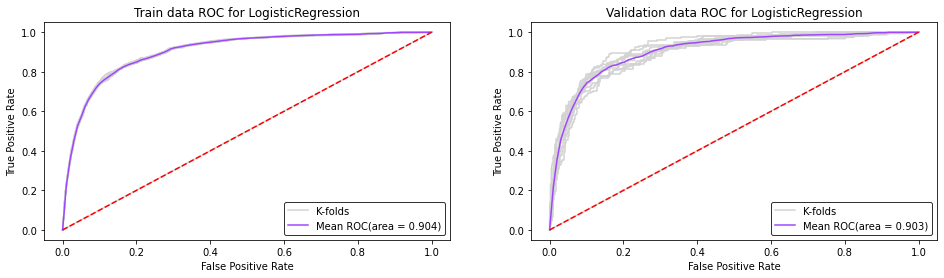

Percentage Gaps: [0.002017362557869995, 0.018628594166475443, 0.008992677610036748, 0.01883021966238929, 0.018581444605864417, 0.01667916106926659, 0.008225529816255794, 0.006010329280882631, 0.018874721016769014, 0.006164053205926834]
The mean AUC difference between the train and the validation is: 0.000581023010875259


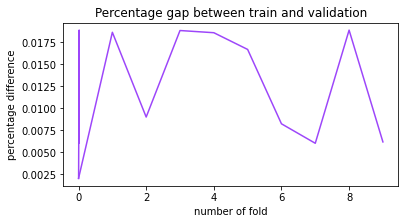

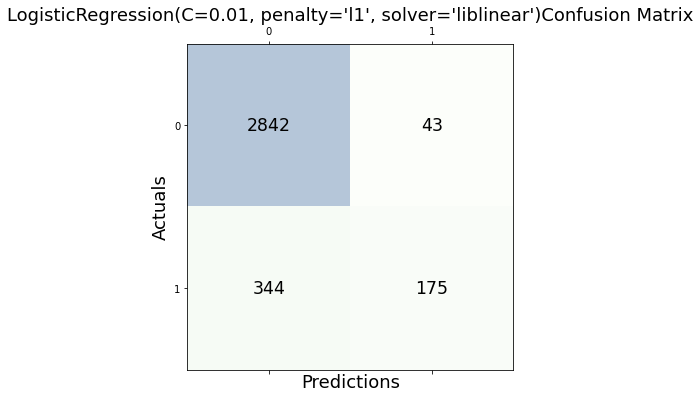

{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}


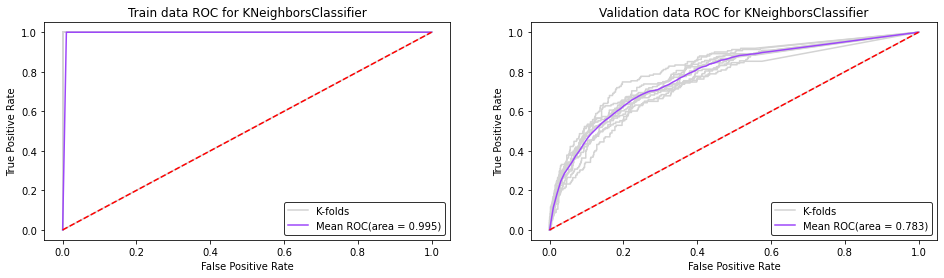

Percentage Gaps: [0.20509274324764082, 0.23438247607655505, 0.18701116852808797, 0.22411439714007153, 0.24111798497569592, 0.21439708939708935, 0.2217371675185945, 0.2529019404019405, 0.19823478760045932, 0.19420905866746074]
The mean AUC difference between the train and the validation is: 0.21238674575130478


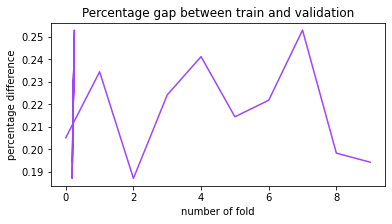

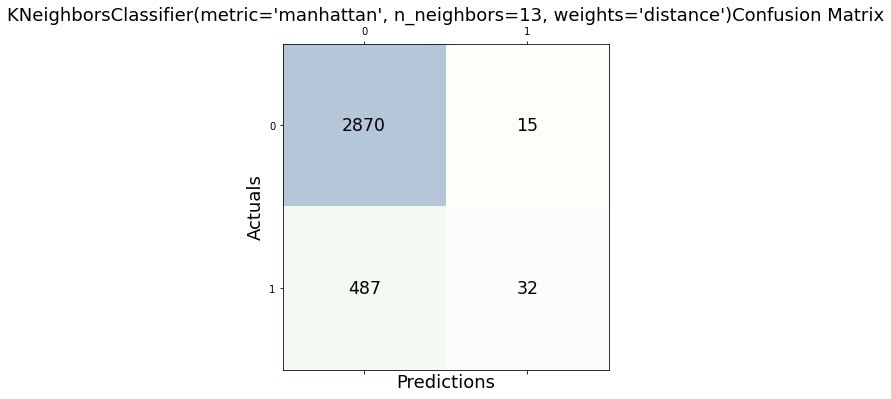

{'max_iter': 1500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'batch_size': 40, 'activation': 'relu'}


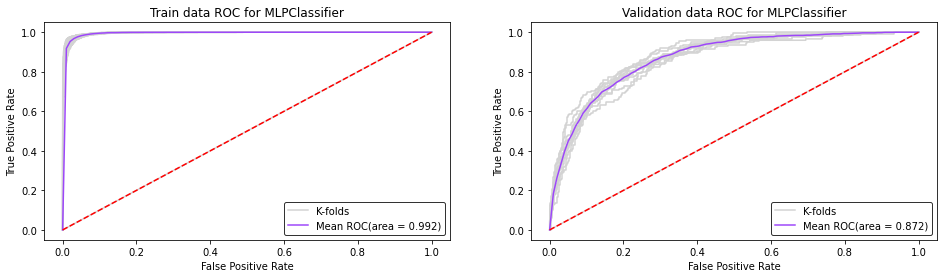

Percentage Gaps: [0.12535122778944396, 0.11947526990799551, 0.10380146467142459, 0.13236254116841228, 0.1385836648584643, 0.1231887498281159, 0.1348690178818548, 0.1313181795804529, 0.11054938469414433, 0.12253021929752084]
The mean AUC difference between the train and the validation is: 0.1204022872370849


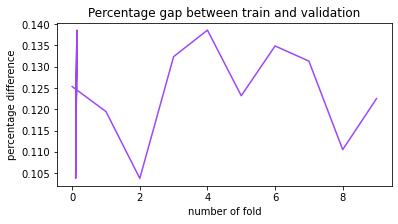

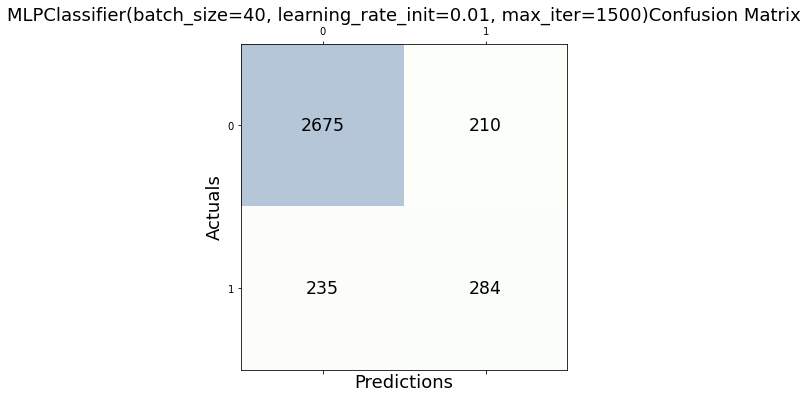

{'probability': True, 'kernel': 'sigmoid', 'gamma': 1e-05, 'degree': 7}


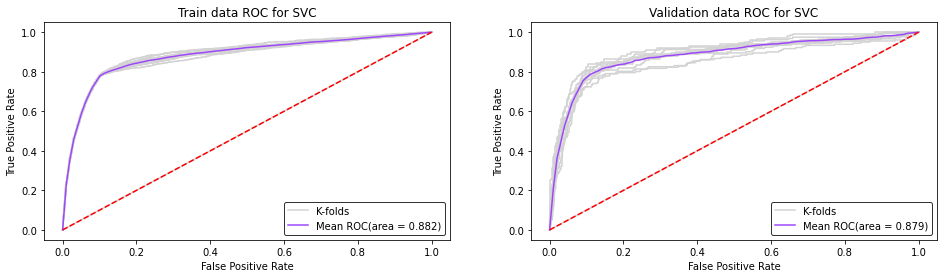

Percentage Gaps: [0.008461490972942576, 0.003600721147317021, 0.00016453728599263862, 0.04529373197659159, 0.018816457865304392, 0.015932064498602072, 0.030185939776566473, 0.0036214284827201793, 0.008587227308770373, 0.016761619773141834]
The mean AUC difference between the train and the validation is: 0.002002409479626044


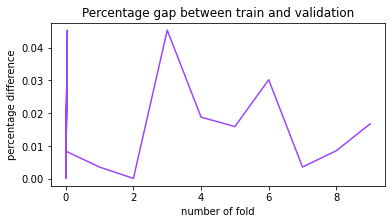

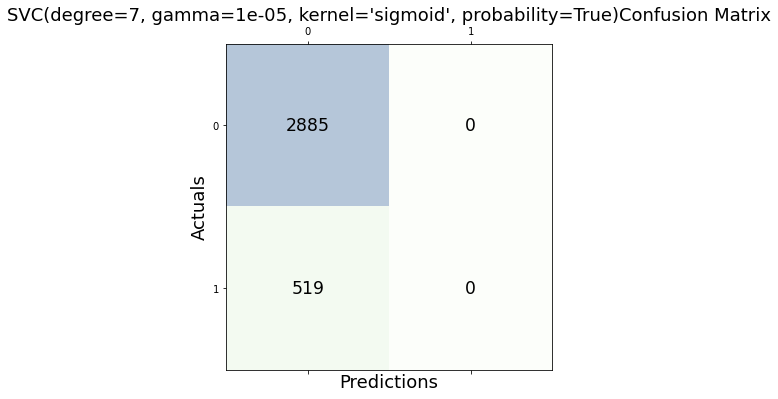

{'n_estimators': 185, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 70, 'criterion': 'entropy'}


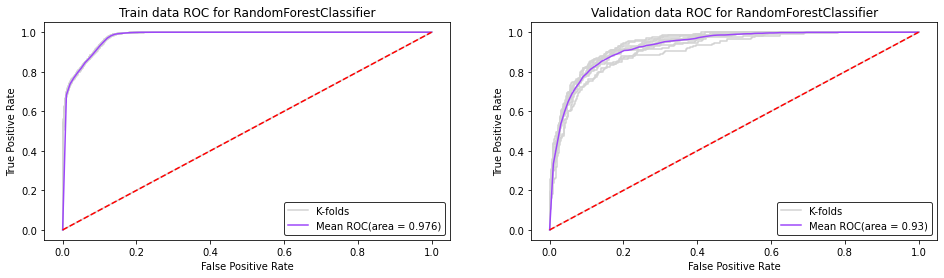

Percentage Gaps: [0.047284922660419726, 0.045308399333051086, 0.04393578081067595, 0.06251680971574136, 0.06219643235552952, 0.03553257255381348, 0.034340929665731657, 0.045821930777903974, 0.04370968956837473, 0.0659343216503232]
The mean AUC difference between the train and the validation is: 0.04573162774050643


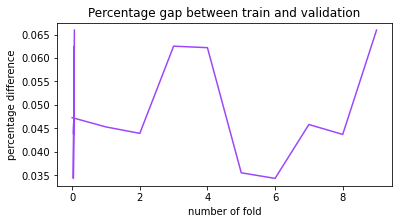

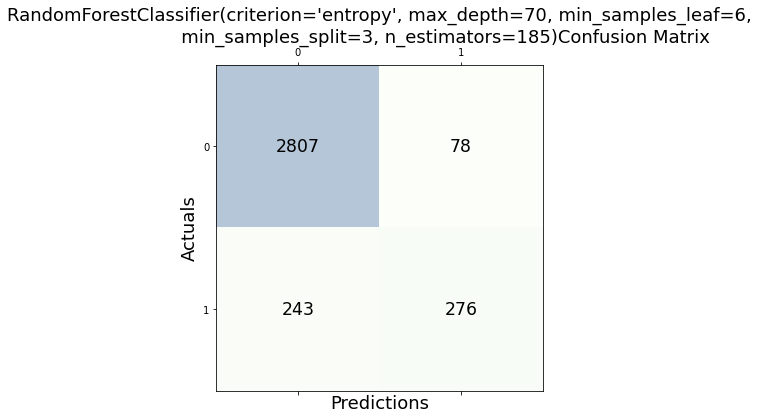

In [43]:
#No PCA data
model_performance_dic = get_optimal_param(X,y,10,
                                        clf_dic = classifier_dic,
                                        params_dic=params_dic,
                                        rand_search_clf=rand_search_clf)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


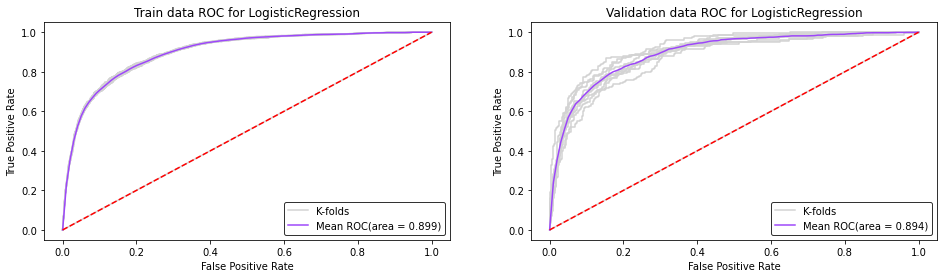

Percentage Gaps: [0.013472684736791862, 0.011713068152841677, 0.0062225988226586315, 0.029326585408807948, 0.0019507635889242092, 0.007358280144838747, 0.01981192894448669, 0.03038581029452625, 0.021298432866280415, 0.017456313691161296]
The mean AUC difference between the train and the validation is: 0.0051914206868325374


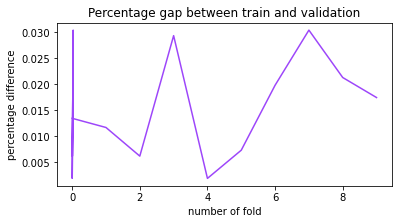

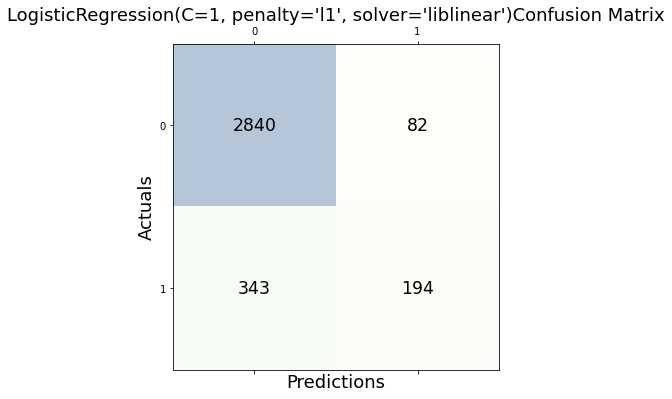

{'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}


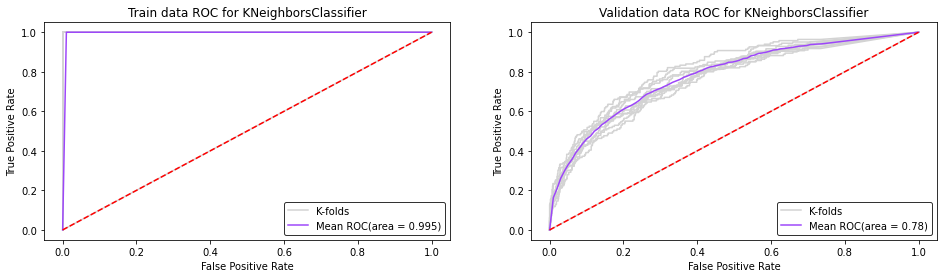

Percentage Gaps: [0.21462749869160658, 0.2386997836240522, 0.23962213587029346, 0.17908201655379985, 0.23516808385155763, 0.21655077125189703, 0.22401473828703544, 0.23022407335658024, 0.19819485912351165, 0.21855606967882424]
The mean AUC difference between the train and the validation is: 0.2146891772648194


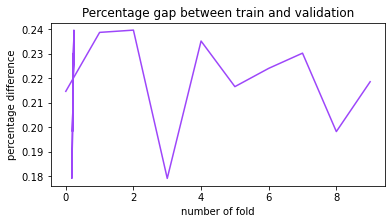

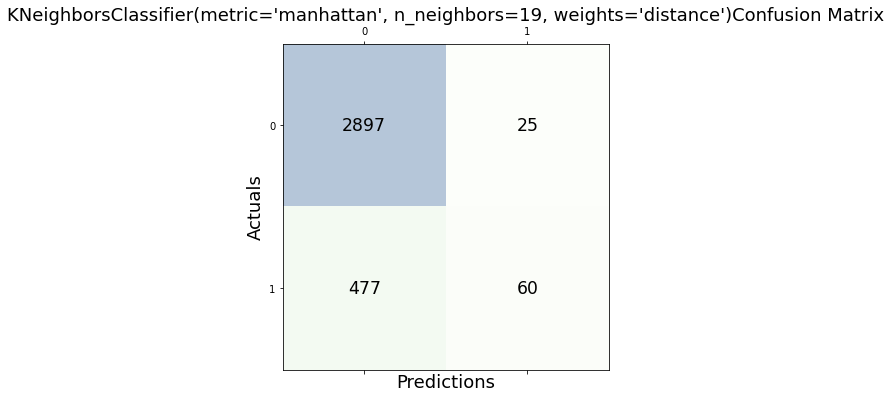

{'max_iter': 1500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'batch_size': 40, 'activation': 'relu'}


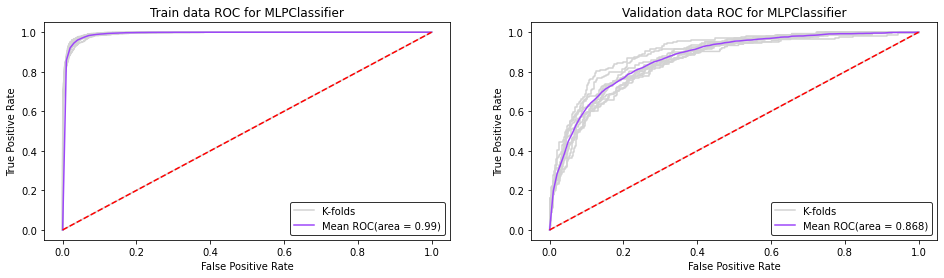

Percentage Gaps: [0.10538873871371213, 0.12089479428387895, 0.13232493645116805, 0.0927161053125416, 0.1187126244569836, 0.123613744515504, 0.1429807777539155, 0.13929058720702148, 0.14623039339388133, 0.13208511663361677]
The mean AUC difference between the train and the validation is: 0.12181687219700243


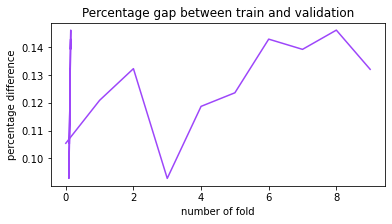

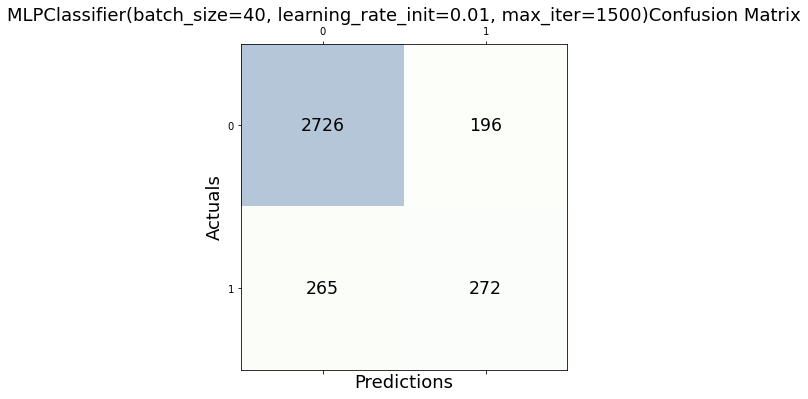

{'probability': True, 'kernel': 'sigmoid', 'gamma': 1e-05, 'degree': 8}


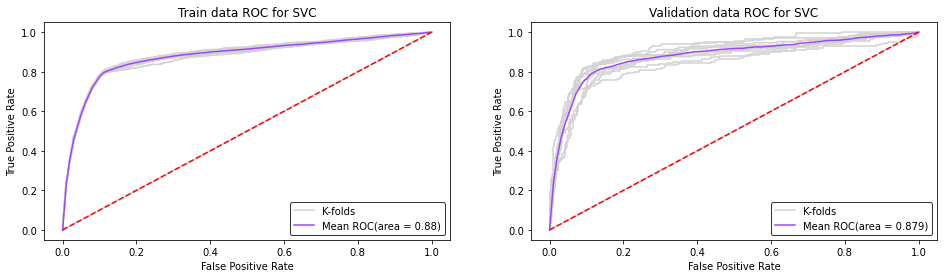

Percentage Gaps: [0.011139549115393499, 0.0305147448924753, 0.01669314079903439, 0.031055691910302774, 0.03129461569764058, 0.006870258308753208, 0.013286259751623564, 0.017899535232986596, 0.03702692706194921, 0.010938646034179267]
The mean AUC difference between the train and the validation is: 0.0012250793991803732


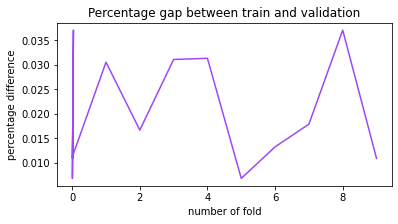

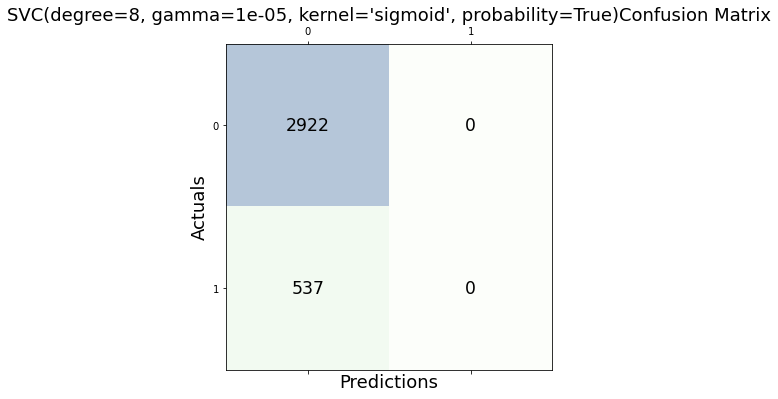

{'n_estimators': 187, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_depth': 73, 'criterion': 'entropy'}


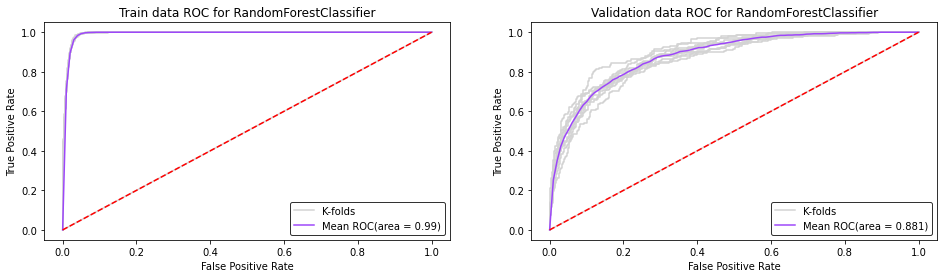

Percentage Gaps: [0.09217483172260543, 0.11453961796444068, 0.11948686267989883, 0.08805009397479924, 0.11553402758834219, 0.11044919626658889, 0.12416118512770302, 0.13561790521279937, 0.11334559151899937, 0.10747727174582855]
The mean AUC difference between the train and the validation is: 0.10964175077670146


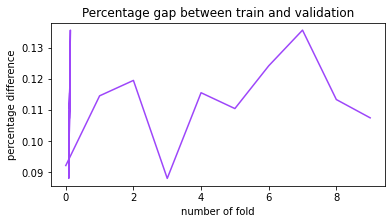

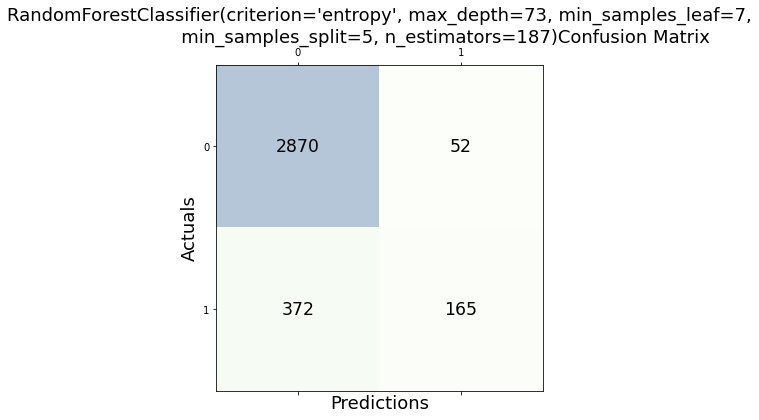

In [44]:
#PCA data
pca_model_performance_dic = get_optimal_param(X_pca,y_pca,10,
                                        clf_dic = classifier_dic,
                                        params_dic=params_dic,
                                        rand_search_clf=rand_search_clf,
                                        data_name='pca')

In [45]:
#Plot graph for all models
def plot_roc_comp(res_dic,name=None):
    fig = plt.figure(figsize=(8,6))
    #res_dic['ann'] = {'fpr':fpr_axis,'tpr':mean_tpr,'auc':mean_auc}
    for key in res_dic.keys():
        auc_val = round(res_dic[key]['auc'],3)
        plt.plot(res_dic[key]['fpr'],res_dic[key]['tpr'],label=f'{key}, AUC={auc_val}')
        
    plt.plot([0,1],[0,1], color='blue', linestyle='--')
    plt.xticks(np.arange(0.0,1.1,step=0.1))
    plt.xlabel('False Positive Rate', fontsize=15)

    plt.yticks(np.arange(0.0,1.1,step=0.1))
    plt.ylabel('True Positive Rate', fontsize=15)

    plt.title(f'{name} ROC Curve Analysis', fontweight='bold',fontsize=15)
    plt.legend(prop = {'size': 13},loc='lower right')
    # fig.savefig(f'plots/{name} Combined ROC',bbox_inches='tight')
    plt.show()

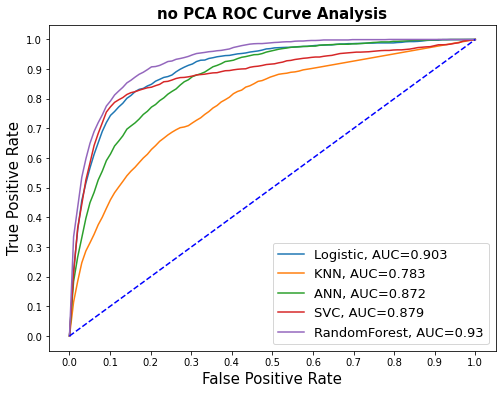

In [46]:
#comparisson for models without pca 
plot_roc_comp(model_performance_dic,name='no PCA')

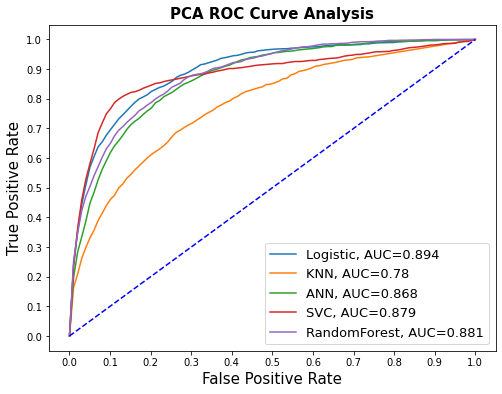

In [47]:
#comparison with pca
plot_roc_comp(pca_model_performance_dic,name='PCA')

In [48]:
# function runs prediciton on validation set
def val_predict(X,y,X_train, X_validation, y_train, y_validation, clf, clf_name, params, to_plot = True):
    fpr_axis = np.linspace(0, 1, 100) #creating array with evenly spaced numbers pver the interval of 100
    #Create plots if needed
    if to_plot:
        fig = plt.figure(facecolor='w',figsize=(16, 4))

        train_plt = fig.add_subplot(121) 
        plt.title(f'Train data ROC for {clf_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        test_plt = fig.add_subplot(122)
        plt.title(f'Validation data ROC for {clf_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

    clf = clf(**params)
    #fit model with train data
    clf.fit(X_train, y_train)
    
    
    #Model prediction probabilities
    y_prob = clf.predict_proba(X_validation)[:,1] #validation prediction 
    y_train_prob =  clf.predict_proba(X_train)[:,1] #train prediction
    
    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_validation, y_prob)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
        
    #interpolation for tpr 
    tpr = np.interp(fpr_axis, fpr, tpr)
    tpr[0] = 0.0

    tpr_train = np.interp(fpr_axis, fpr_train, tpr_train)
    tpr_train[0] = 0.0    

    auc_val = auc(fpr_axis, tpr)
    auc_train = auc(fpr_axis, tpr_train)   

    if to_plot:
        # Plot mean ROC
        test_plt.plot(fpr_axis,tpr,color='#9D46FA',linestyle='-', label = f'{clf_name} ROC(area = {round(auc_val,3)})')
        train_plt.plot(fpr_axis,tpr_train,color='#9D46FA',linestyle='-', label = f'{clf_name} ROC(area = {round(auc_train,3)})')

        #ploting line for tpr=fpr
        test_plt.plot([0,1],[0,1],color='red',linestyle ='--')
        train_plt.plot([0,1],[0,1],color='red',linestyle ='--')

        #legend placement
        test_plt.legend(loc='lower right',edgecolor='k') 
        train_plt.legend(loc='lower right',edgecolor='k') 
        # plt.savefig(f'plots/Validation_roc.png',bbox_inches='tight')
        plt.show()

        # Confusion Matrix Plot and report
        print('Validation data confusion matrix')
        confusion_matrix_plot(X,y,clf)
        # plt.savefig(f'plots/Confusion matrix.png',bbox_inches='tight')
        train_score = clf.score(X_validation,y_validation)
        print(f'Validation data accuracy: {train_score}')
        
        #get prediction labels
        y_pred = clf.predict(X_validation)
        print(classification_report(y_validation, y_pred))

        
    perc_diff = 1-(min(auc_train,auc_val)/max(auc_train,auc_val))

    if perc_diff > 0.03:
        print(f'Percentage difference between train and validation is {perc_diff}, therefore the model is overfitted')
    else:
        print(f'Percentage difference between train and validation is {perc_diff}, therefore the model is not overfitted')

    return auc_val,perc_diff

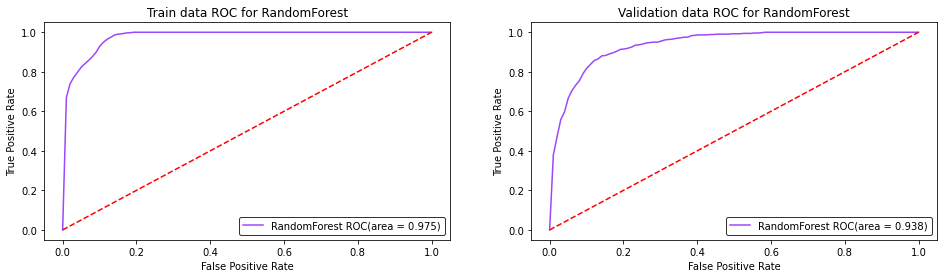

Validation data confusion matrix


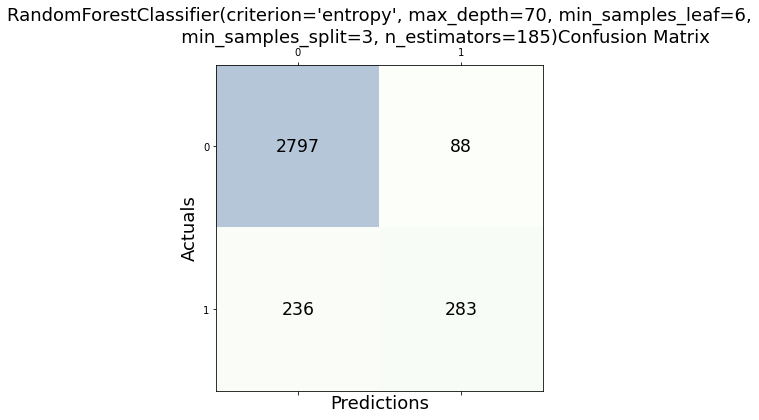

Validation data accuracy: 0.9048178613396005
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2885
           1       0.76      0.55      0.64       519

    accuracy                           0.90      3404
   macro avg       0.84      0.76      0.79      3404
weighted avg       0.90      0.90      0.90      3404

Percentage difference between train and validation is 0.038772911388568865, therefore the model is overfitted


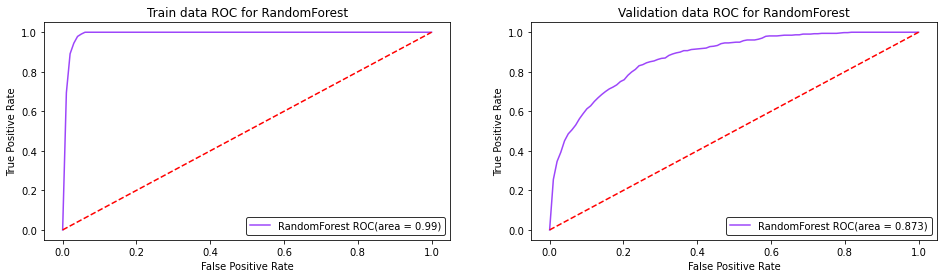

Validation data confusion matrix


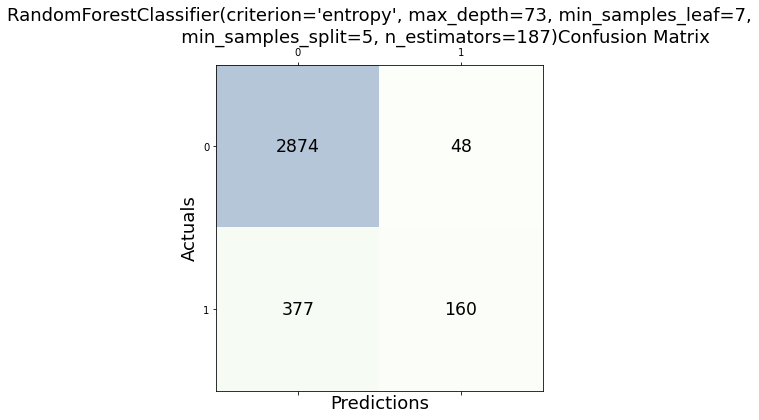

Validation data accuracy: 0.8771321191095692
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2922
           1       0.77      0.30      0.43       537

    accuracy                           0.88      3459
   macro avg       0.83      0.64      0.68      3459
weighted avg       0.87      0.88      0.85      3459

Percentage difference between train and validation is 0.11815572426955379, therefore the model is overfitted


(0.8729285405263059, 0.11815572426955379)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33, shuffle=True,random_state=42)
auc_dic = {}
pca_auc_dic = {}
# extract auc values for each model
for clf_key in model_performance_dic.keys():
    auc_dic[clf_key] = model_performance_dic[clf_key]['auc']
for clf_key in pca_model_performance_dic.keys():
    pca_auc_dic[clf_key] = pca_model_performance_dic[clf_key]['auc']
# find model with best auc no pca
best_model_key = max(auc_dic, key=auc_dic.get)
best_model = classifier_dic[best_model_key]
params = model_performance_dic[best_model_key]['best_params']

best_model_key_pca = max(pca_auc_dic, key=auc_dic.get)
best_model_pca = classifier_dic[best_model_key_pca]
params_pca = pca_model_performance_dic[best_model_key_pca]['best_params']

# run best model on validation set
val_predict(X,y,X_train, X_test, y_train, y_test, best_model, best_model_key, params)
val_predict(X_pca,y_pca,X_train_pca, X_test_pca, y_train_pca, y_test_pca, best_model_pca, best_model_key_pca, params_pca)

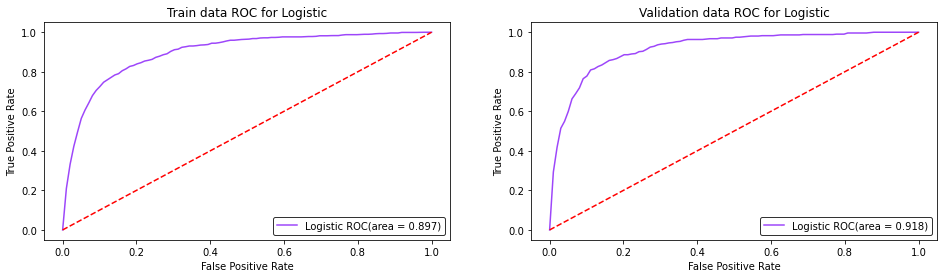

Validation data confusion matrix


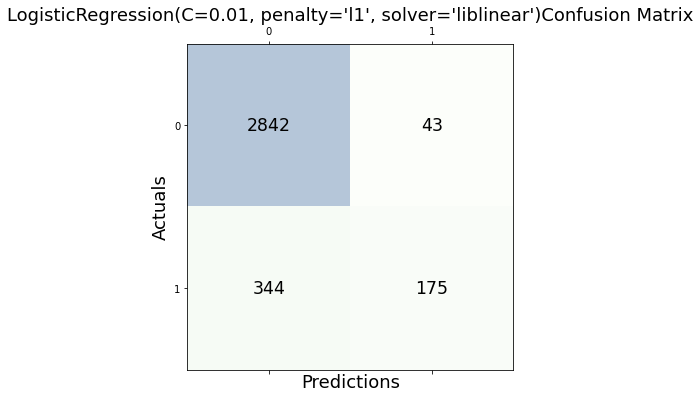

Validation data accuracy: 0.886310223266745
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2885
           1       0.80      0.34      0.47       519

    accuracy                           0.89      3404
   macro avg       0.85      0.66      0.71      3404
weighted avg       0.88      0.89      0.87      3404

Percentage difference between train and validation is 0.022912852186805055, therefore the model is not overfitted


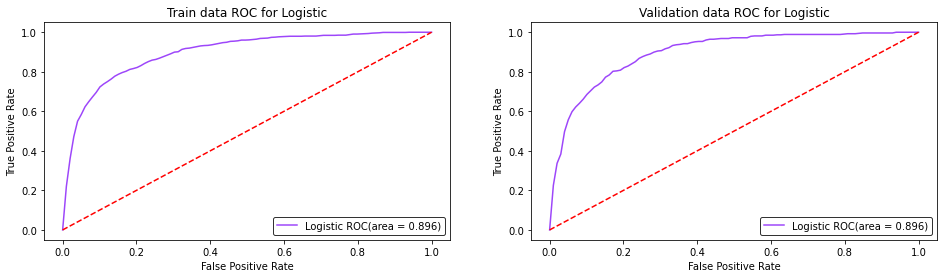

Validation data confusion matrix


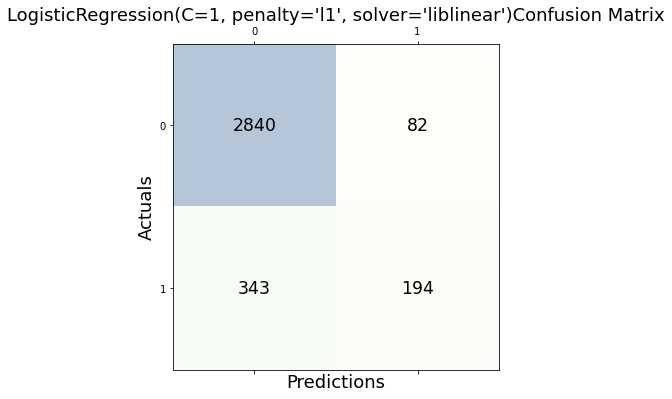

Validation data accuracy: 0.8771321191095692
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2922
           1       0.70      0.36      0.48       537

    accuracy                           0.88      3459
   macro avg       0.80      0.67      0.70      3459
weighted avg       0.86      0.88      0.86      3459

Percentage difference between train and validation is 0.0001166218489981885, therefore the model is not overfitted


(0.8961777928258376, 0.0001166218489981885)

In [50]:
auc_dic.pop(best_model_key)
pca_auc_dic.pop(best_model_key_pca)
# find model with best auc no pca
best_model_key = max(auc_dic, key=auc_dic.get)
best_model = classifier_dic[best_model_key]
params = model_performance_dic[best_model_key]['best_params']

best_model_key_pca = max(pca_auc_dic, key=auc_dic.get)
best_model_pca = classifier_dic[best_model_key_pca]
params_pca = pca_model_performance_dic[best_model_key_pca]['best_params']

# run best model on validation set
val_predict(X,y,X_train, X_test, y_train, y_test, best_model, best_model_key, params)
val_predict(X_pca,y_pca,X_train_pca, X_test_pca, y_train_pca, y_test_pca, best_model_pca, best_model_key_pca, params_pca)